In [2]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *

Welcome to JupyROOT 6.26/08


## 1. Generate event files

In [13]:
Likelihood.EventDisplay.initialize(dwarf = "UMa_II", effCut=0.15, biasCut=0.2, export=True, ext=True)

Events (dwarf: UMa_II) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_UMa_II_ext.npy.


In [10]:
for dwarf in const.ListOfDwarf:
    try:
        Likelihood.EventDisplay.initialize(dwarf = dwarf, effCut=0.15, biasCut=0.2, export=True, ext=True)
    except:
        print(dwarf)

Events (dwarf: Bootes_I) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_Bootes_I_ext.npy.
Events (dwarf: ComBer) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_ComBer_ext.npy.
Events (dwarf: CVn_I) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_CVn_I_ext.npy.
Events (dwarf: CVn_II) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_CVn_II_ext.npy.
Events (dwarf: Draco_II) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_Draco_II_ext.npy.
Events (dwarf: Hercules) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_Hercules_ext.npy.
Events (dwarf: Leo_I) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_Leo_I_ext.npy.
Events (dwarf: Leo_II) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_Leo_II_ext.npy.
Events (dwarf: Leo_IV) are saved in /Users/dtak/Research/DarkMatter/Data/EventDisplay_Events_Leo_IV_ext.npy.
Events (dwa

In [15]:
f = TFile("../../DarkMatter/forConor/irf/EventDisplay_IRFs_CVn_II_ext.root")

In [ ]:
f.EffectiveArea

## 2. Generate IRFs

In [11]:
dwarf="UMa_II"
runlist = printRunList(dwarf, package="EventDisplay", ext=True, log_only=True)
for i, run in tqdm(enumerate(runlist), total=len(runlist)):

    ResponseFunction.EventDisplay(dwarf, run, from_log=False,
                          mode="all", export=True, verbose=False, ext=True)
    

  0%|          | 0/462 [00:00<?, ?it/s]

In [2]:
import scipy

In [14]:
events = Likelihood.readData("UMa_II", ext=True, rawdata=True)

In [4]:
binEdges = np.logspace(1, 7, 101)
sigma = 1

In [11]:
bkg = events[events[:,2] == 0.0][:,0]
y, x = np.histogram(bkg, bins=binEdges)
y = y*0.167
x = center_pt(x)
y_idx = [i for i, f in enumerate(y != 0) if f][0]
filtered_y = scipy.ndimage.gaussian_filter(y[y_idx:], sigma=sigma)
cnts = y[:y_idx].tolist() + filtered_y.tolist()

In [12]:
y_idx = [i for i, f in enumerate(y != 0) if f][0]
filtered_y = scipy.ndimage.gaussian_filter(y[y_idx:], sigma=1)
newy = y[:y_idx].tolist() + filtered_y.tolist()

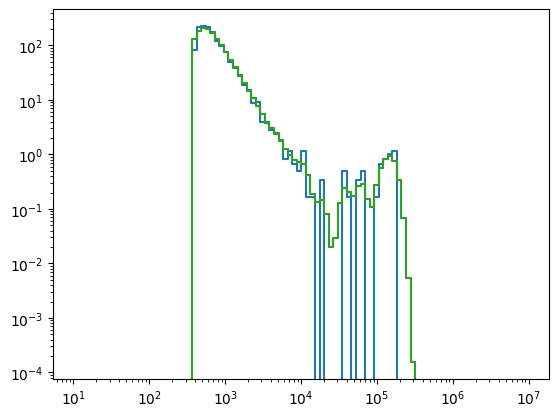

In [13]:
plt.step(x, y, where="mid")
plt.step(x,newy, where="mid")
plt.step(x,cnts, where="mid")
plt.xscale("log")
plt.yscale("log")

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.52169801e-03, 5.05966626e-02,
       2.93234292e-01, 1.32034013e+00, 4.74997551e+00, 1.37927279e+01,
       3.26054558e+01, 6.33721315e+01, 1.02497637e+02, 1.39999708e+02,
       1.64356838e+02, 1.69280854e+02, 1.56536384e+02, 1.33200679e+02,
       1.06818939e+02, 8.23484509e+01, 6.18687483e+01, 4.56816099e+01,
       3.33367959e+01, 2.41552681e+01, 1.74396954e+01, 1.25712295e+01,
       9.05364619e+00, 6.52657819e+00, 4.73787051e+00, 3.48927371e+00,
       2.60886149e+00, 1.96671020e+00, 1.49033000e+00, 1.14633315e+00,
       9.06454377e-01, 7.31236040e-01, 5.81165891e-01, 4.37476676e-01,
       3.07773367e-01, 2.07370336e-01, 1.40170850e-01, 1.00830973e-01,
      

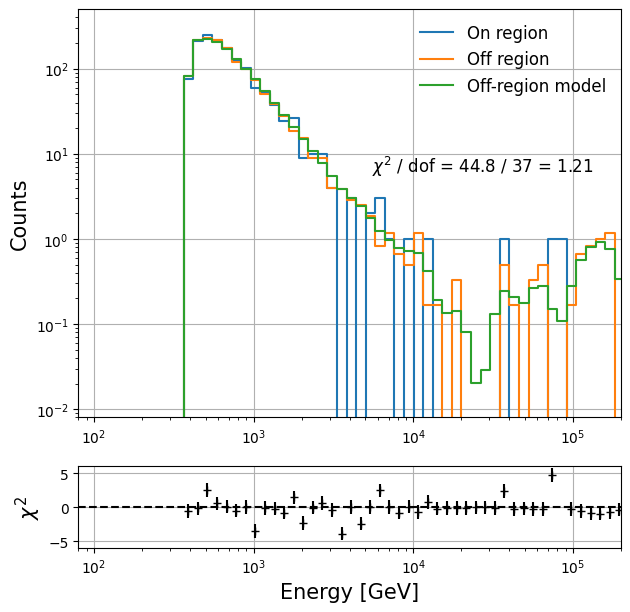

In [27]:
Likelihood.plotData("UMa_II", ext=True, bkgModel="gaus")


## 3. Generate ULs (seed = 0)

In [50]:
dwarf = "Segue_1"
jSeed = 0
package="EventDisplay"
channel = "tt"

In [61]:
mass = np.logspace(np.log10(200), 4.5, 10)

filename=f"{package}_{dwarf}_{channel}_1D_final"
OUTPUT = Likelihood.calcUpperLimits(dwarf, channel, mass=mass, package=package, method=2, filename=filename,
            averagedIRF=True, statistic="unbinned", bkgModel=None,
            jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True, 
            useBias=True, returnMLE=True)


[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : tt
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Warning] 1 events have p_bkg of 0. They are ignored when calculating the likelihood.
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_1_tt_1D_final.npy'


[Log] Package      : EventDisplay
[Log] Dwarf        : Bootes_I
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

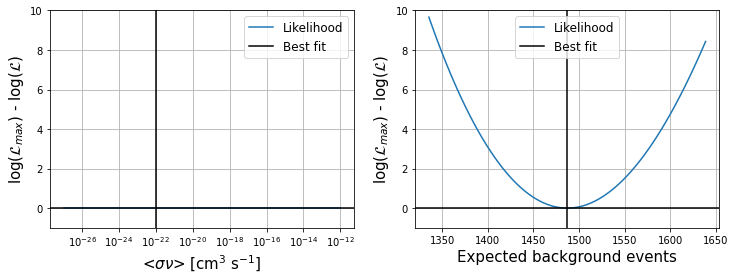

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


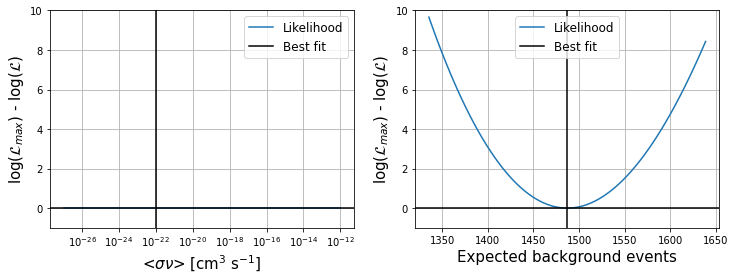

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Bootes_I_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : ComBer
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

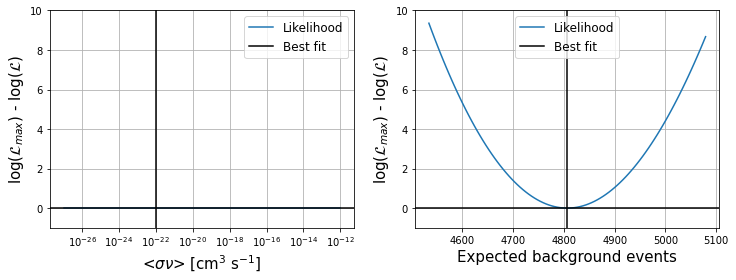

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_ComBer_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_I
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

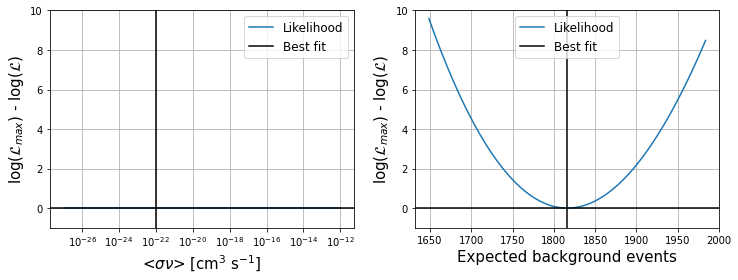

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_CVn_I_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_II
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

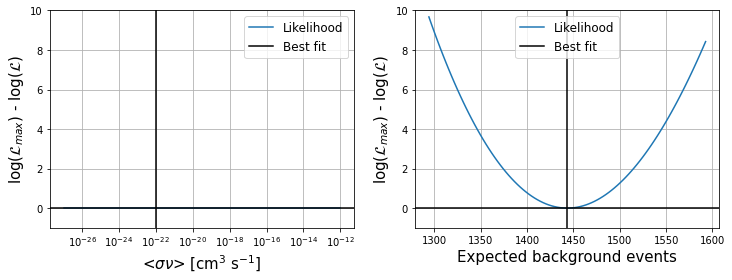

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_CVn_II_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Draco
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

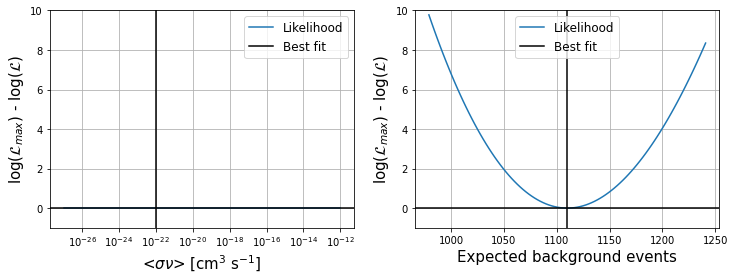

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


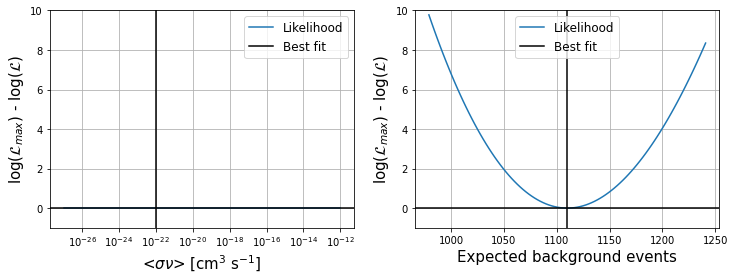

[Log, Error] The upper limit is not estimated (M=0.135 TeV).


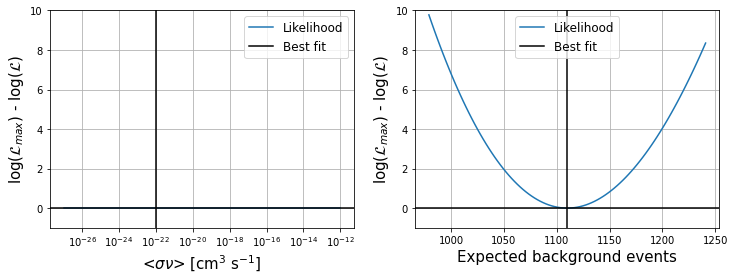

[Log, Error] The upper limit is not estimated (M=0.183 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Draco_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Hercules
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

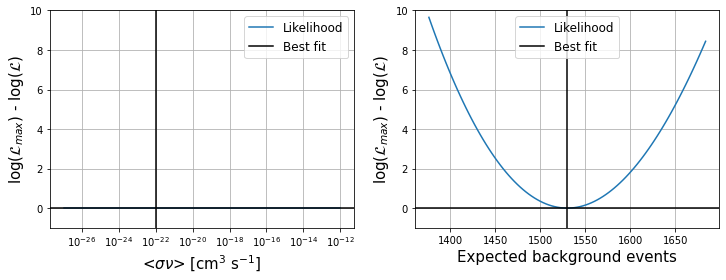

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Hercules_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_I
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

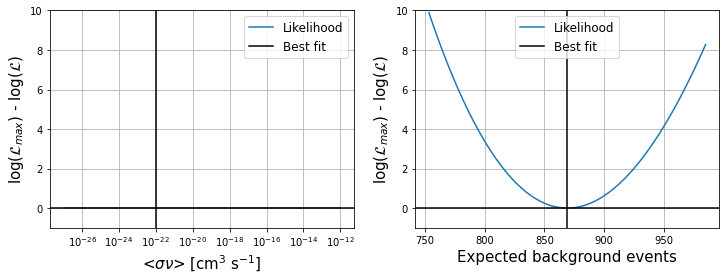

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


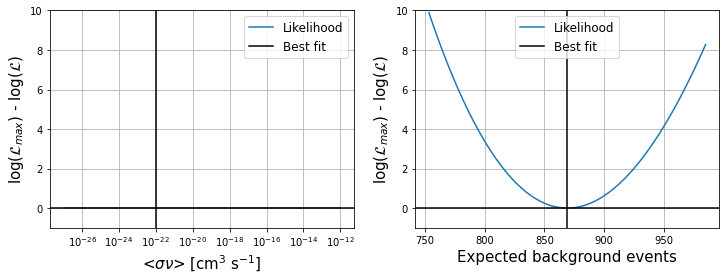

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_I_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_II
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV
[Error] EA is not imported for run 84473.
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_IV
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

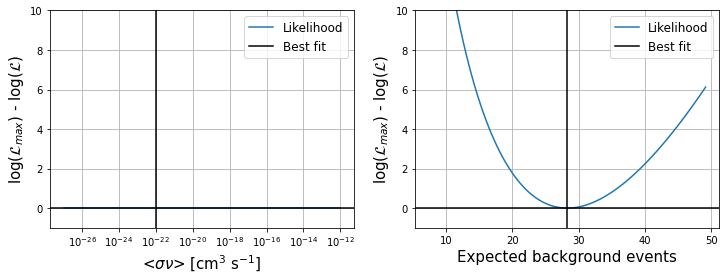

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


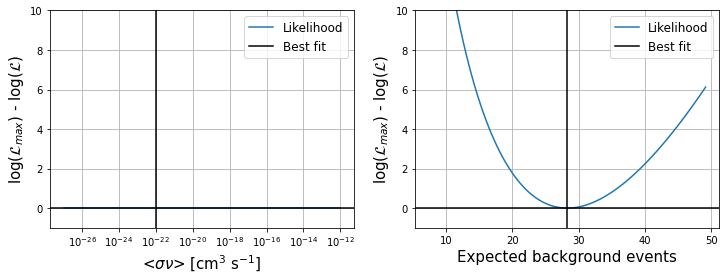

[Log, Error] The upper limit is not estimated (M=0.135 TeV).


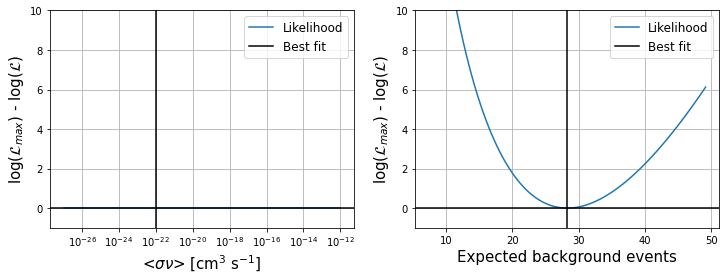

[Log, Error] The upper limit is not estimated (M=0.183 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_IV_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_V
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

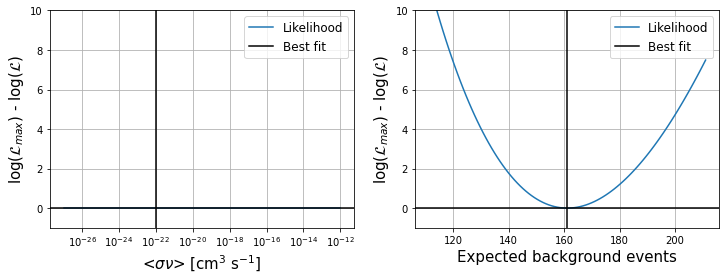

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


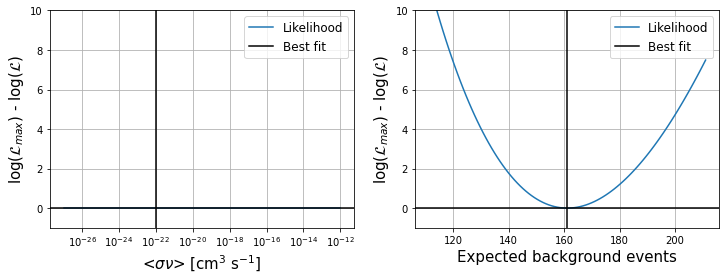

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_V_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

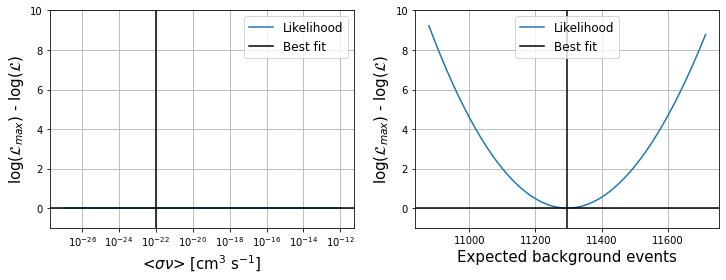

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_1_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_2
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

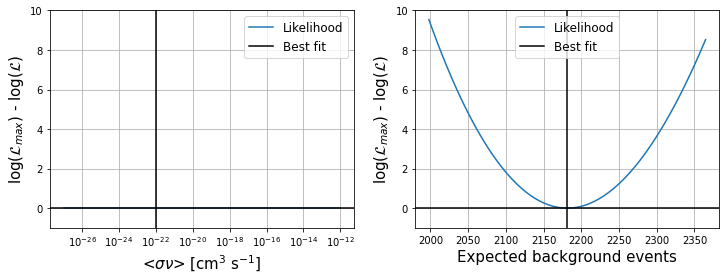

[Log, Error] The upper limit is not estimated (M=0.100 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_2_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Sextans
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

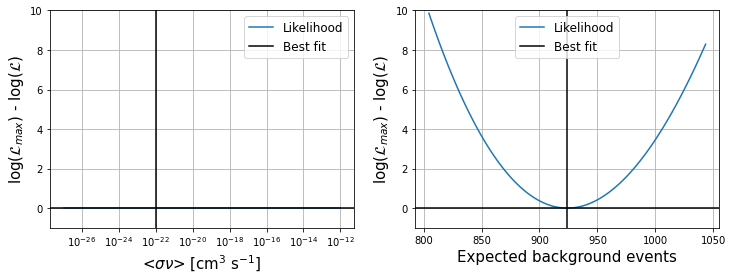

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


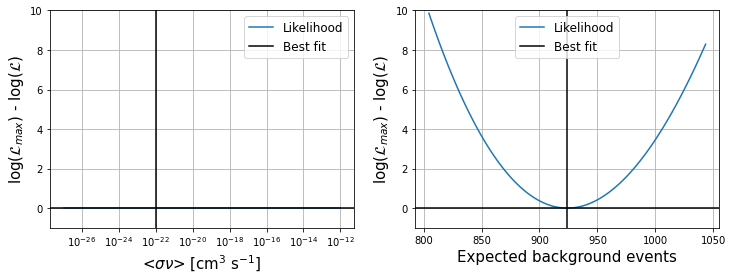

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Sextans_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Triangulum_II
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

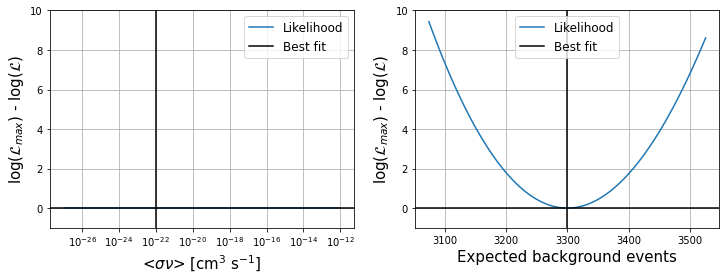

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


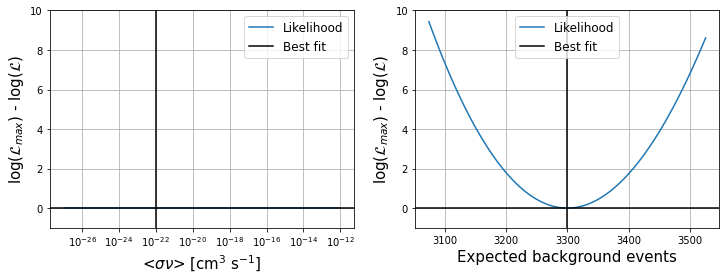

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Triangulum_II_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_I
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

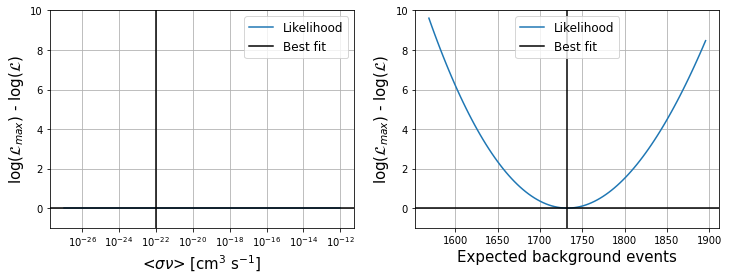

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


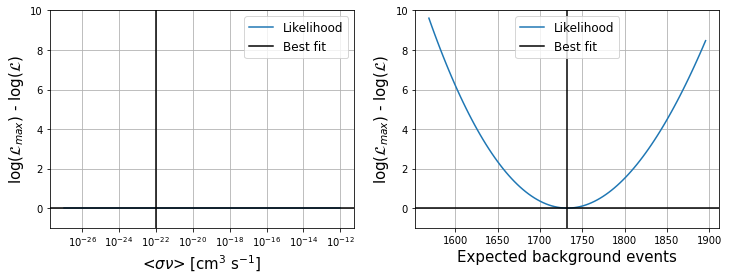

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_UMa_I_tt_1D_final.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_II
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV
[Error] EA is not imported for run 75701.
[Log] Package      : EventDisplay
[Log] Dwarf        : UMi
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/20 [00:00<?, ?it/s]

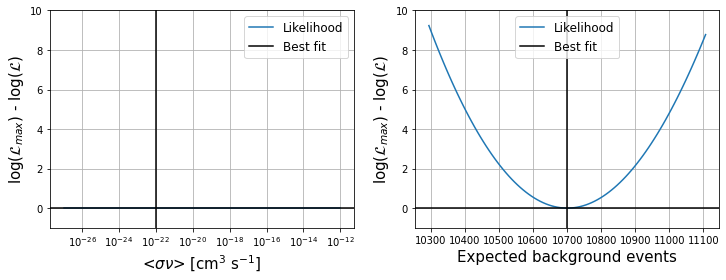

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


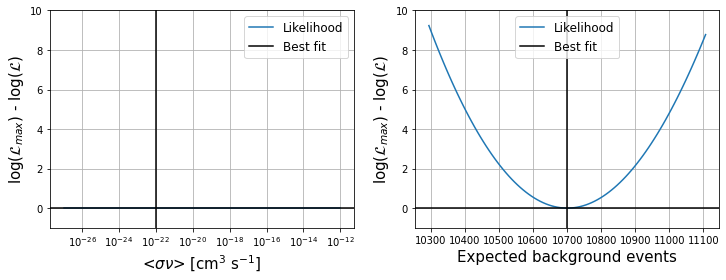

[Log, Error] The upper limit is not estimated (M=0.135 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_UMi_tt_1D_final.npy'


Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//EventDisplay_IRFs_Leo_II_ext.root does not exist
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion_norm (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Error in <TFile::TFile>: file /Users/dtak/Research/DarkMatter/Output//EventDisplay_IRFs_UMa_II_ext.root does not exist


In [7]:
channel = "tt"
package="EventDisplay"


jSeed=0

for dwarf in const.ListOfDwarf:
    filename=f"{package}_{dwarf}_{channel}_1D_final"
    try:
        OUTPUT = Likelihood.calcUpperLimits(dwarf, channel, package=package, method=2, filename=filename,
                    averagedIRF=True, statistic="unbinned", bkgModel="ex", 
                    jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True, 
                    useBias=True, returnMLE=True)
    except:
        continue

In [8]:
for dwarf in const.ListOfDwarf:

    try:
        importedIRF = ResponseFunction.EventDisplay.averagedIRFs(dwarf, version="all", export=True, ext=True)
    except:
        print(dwarf)

Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

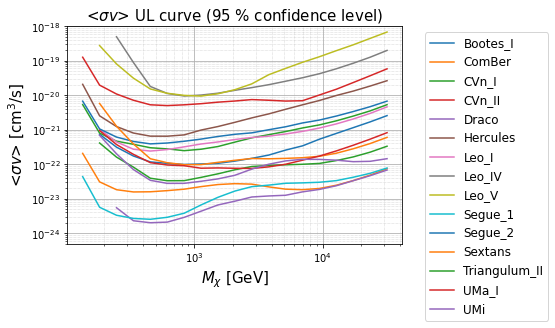

In [9]:
for dwarf in const.ListOfDwarf:
    try:
        Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final", label=dwarf)
    except:
        
        pass
    plt.ylim(5e-25, 1e-18)
    plt.savefig(f"total_1D_final.pdf")

In [65]:
dwarf = "Segue_1"
channel = "tt"
mass = np.logspace(np.log10(200), 4.5, 10)
package="EventDisplay"

jSeed=0
filename=f"{package}_{dwarf}_{channel}_1D_final_exp"
Likelihood.calcExpectedLimits(dwarf, channel, mass=mass, package=package, method=2, averagedIRF=True, 
                              jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True, 
                              useBias=True, filename=filename, bkgModel="gaus",
                              verbosity=0, runs=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

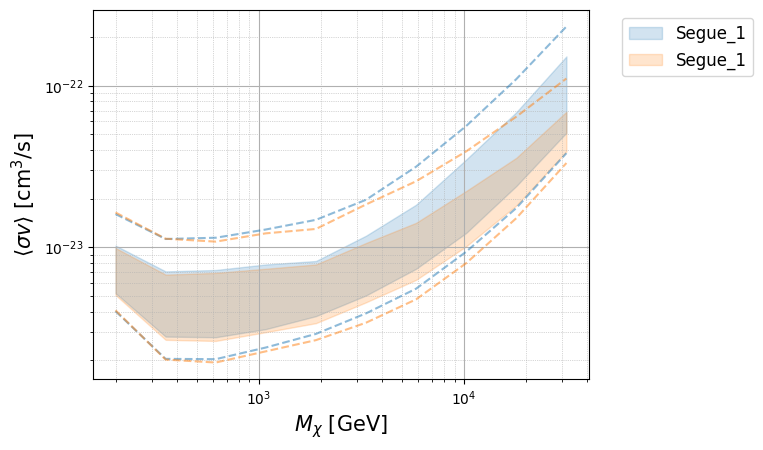

In [67]:
dwarf = "Segue_1"
Likelihood.plotExpULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final_exp", label=dwarf)
Likelihood.plotExpULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_exp", label=dwarf)

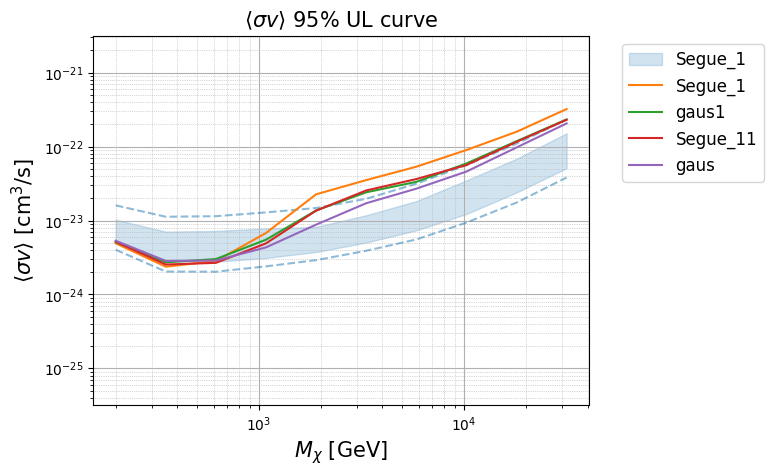

In [66]:
dwarf = "Segue_1"
Likelihood.plotExpULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final_exp", label=dwarf)
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final", label=dwarf)
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_gaus", label="gaus1")
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final", label=dwarf+"1")
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final_gaus", label="gaus")


# dwarf = "UMa_II"
# Likelihood.plotExpULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final_exp", label=dwarf)
# Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final", label=dwarf)

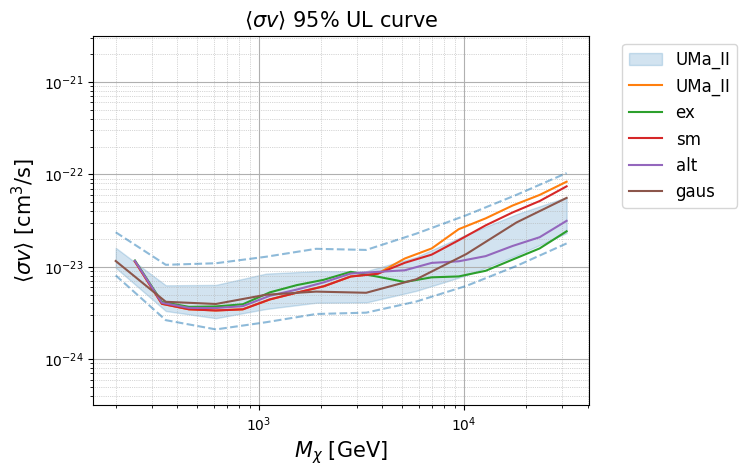

In [48]:
dwarf = "UMa_II"
Likelihood.plotExpULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_exp", label=dwarf)
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final", label=dwarf)
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_ex", label="ex")
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_sm", label="sm")
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_alt", label="alt")
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_2D_final_gaus", label="gaus")

# dwarf = "UMa_II"
# Likelihood.plotExpULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final_exp", label=dwarf)
# Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final", label=dwarf)

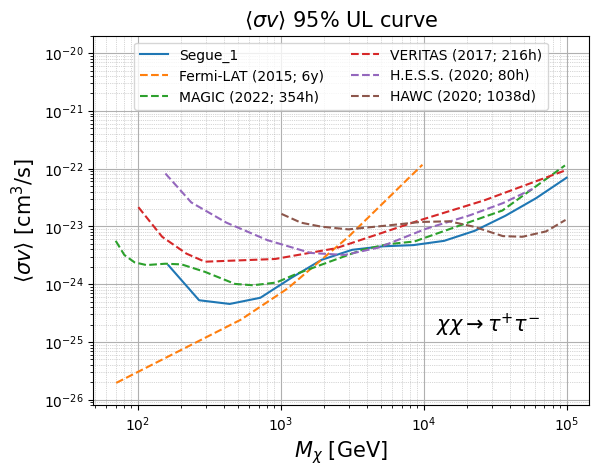

In [59]:
dwarf="Segue_1"
channel="tt"
Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}_1D_final", label=dwarf)
Likelihood.plotPublication("tt", textloc=0.2)
plt.ylim(8e-27, 2e-20)
plt.legend(loc=9, ncol=2)
plt.savefig("tt.pdf")